In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
5,139 cases (7 day average) as of Tue 08 Jun, +297.7 since Mon 07 Jun
120 hospitalised (7 day average) as of Wed 09 Jun, +0.0 since Wed 09 Jun
6 died (7 day average) as of Tue 08 Jun, +0.6 since Mon 07 Jun


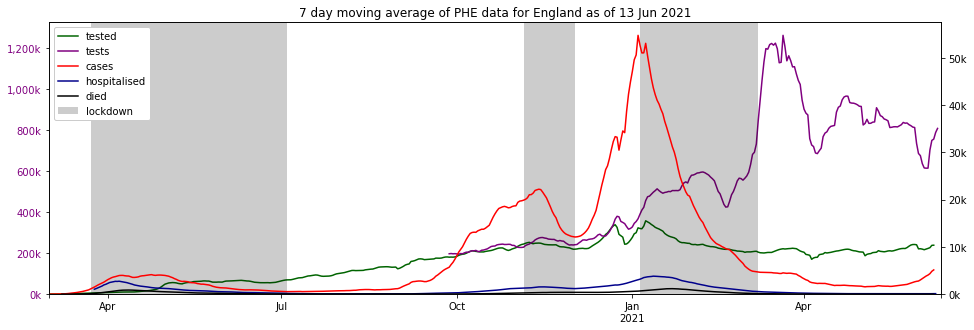

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

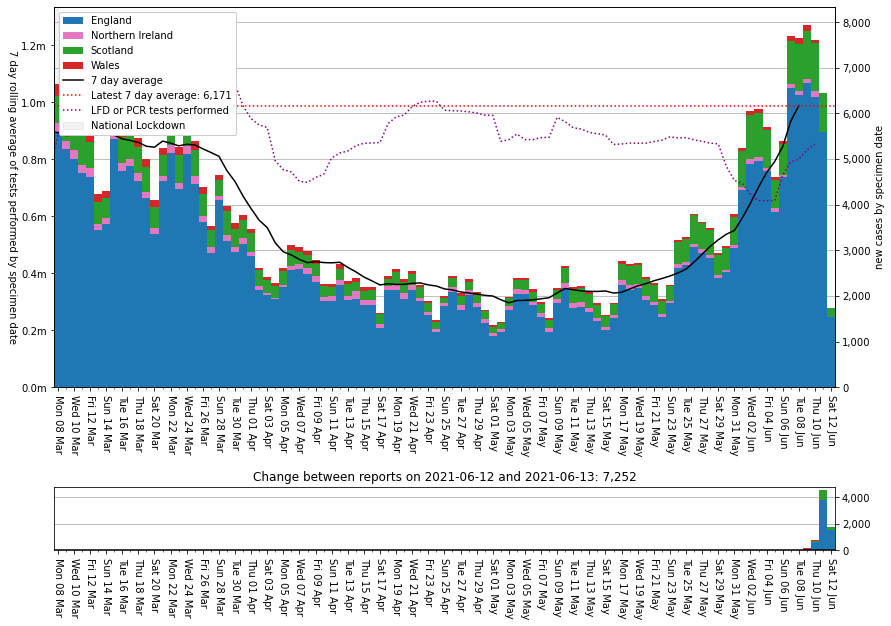

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

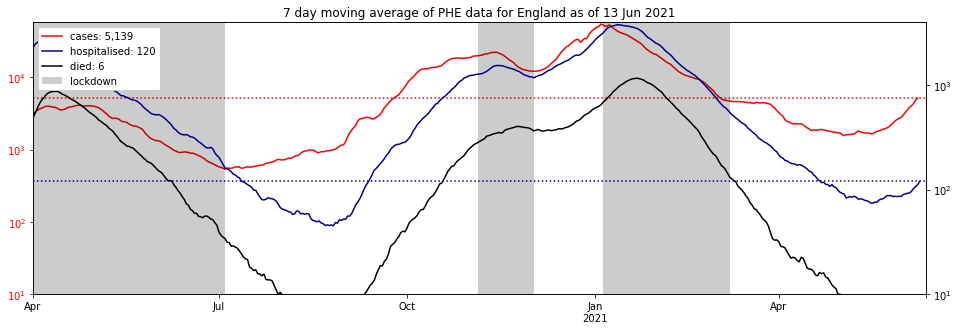

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

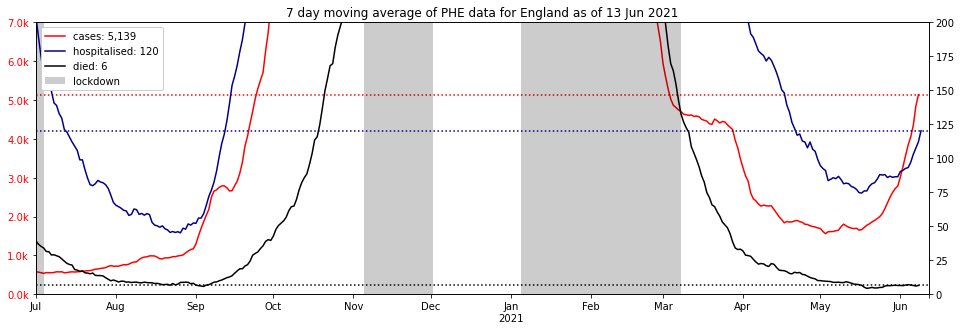

In [19]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=7_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,25238467.0,34727273.0,9488806.0,56286961,44.838923,16.857911,38.303166
1,Northern Ireland,N92000002,750356.0,1113591.0,363235.0,1893667,39.624496,19.181567,41.193937
2,Scotland,S92000003,2425825.0,3497287.0,1071462.0,5463300,44.402193,19.611993,35.985814
3,Wales,W92000004,1378010.0,2213050.0,835040.0,3152879,43.706403,26.485000,29.808597


'partial: 41,551,201 (62.2%), full: 29,792,658'

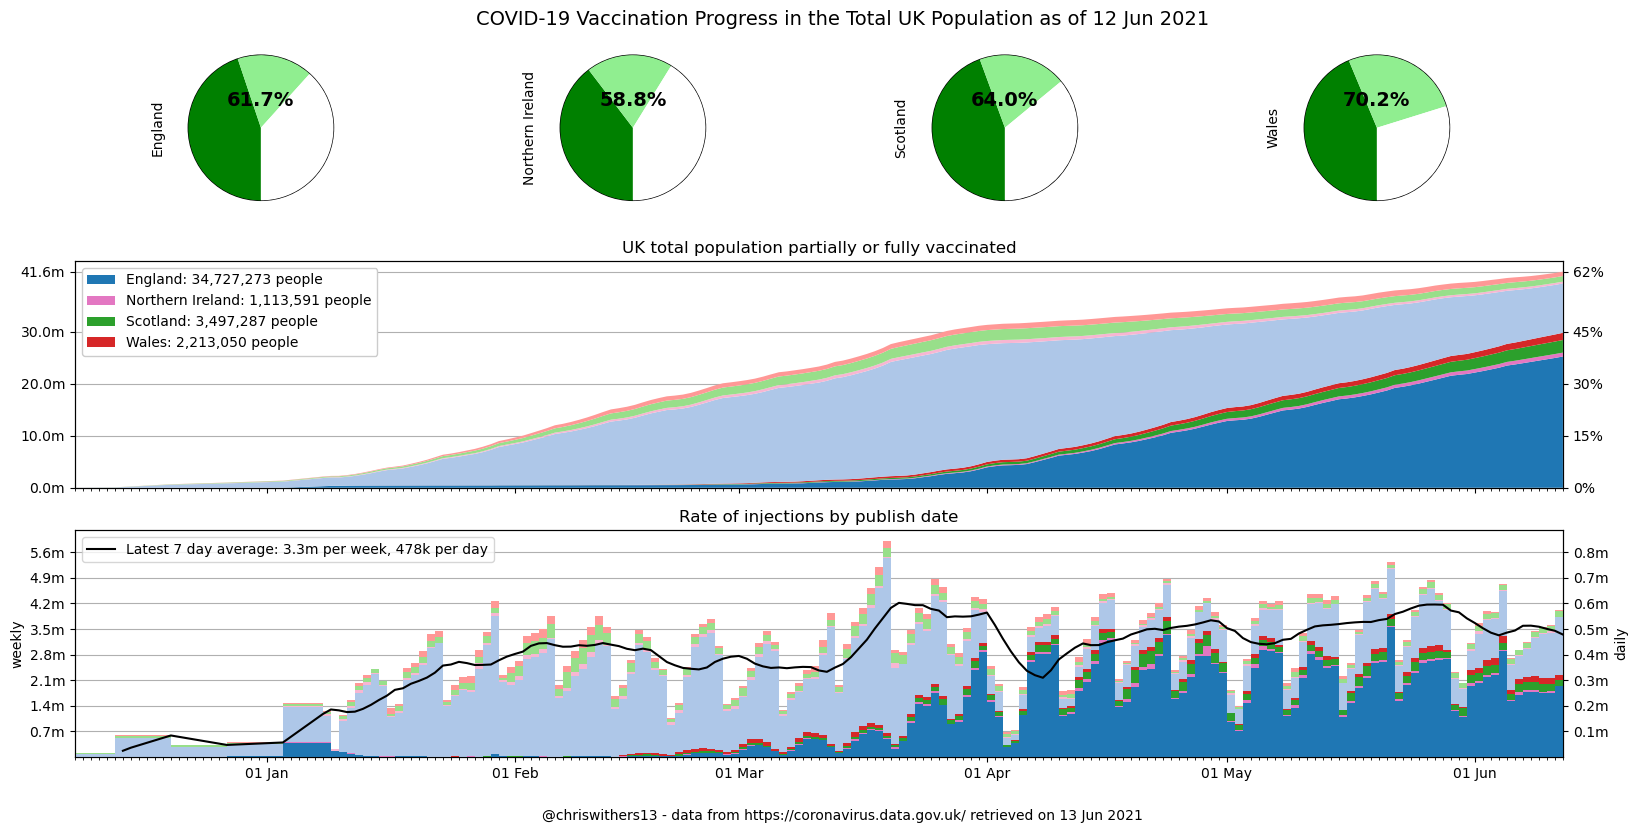

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

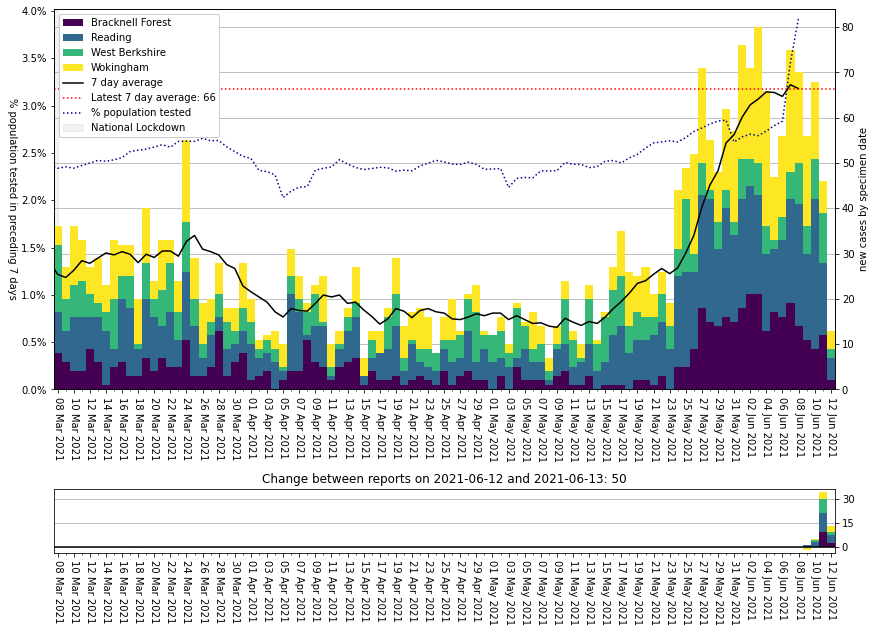

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=unique_people_tested)

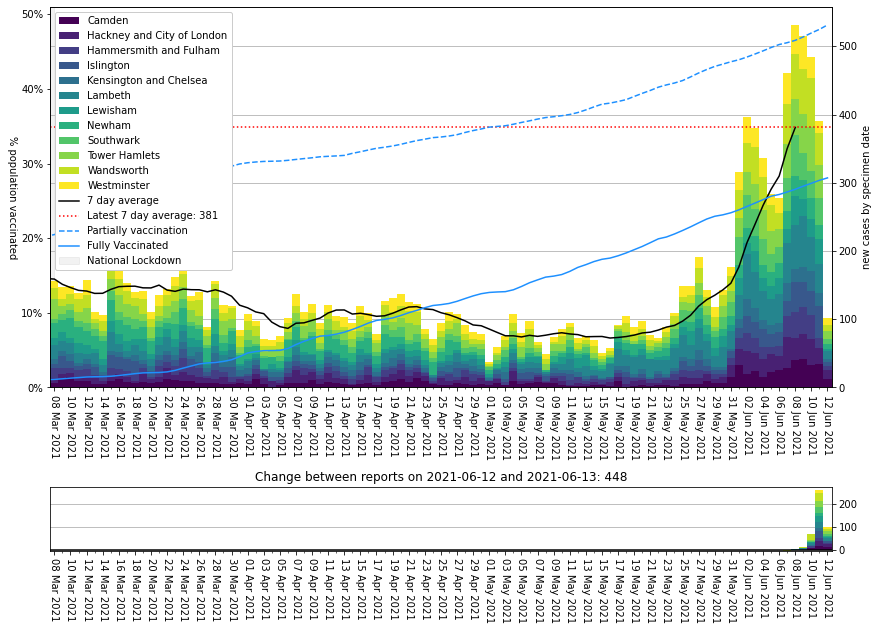

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E06000008,Blackburn with Darwen,527.068192,789.0,2021-06-12
E07000124,Ribble Valley,440.152411,268.0,2021-06-12
E07000120,Hyndburn,401.021680,325.0,2021-06-12
E07000117,Burnley,337.381916,300.0,2021-06-12
E07000125,Rossendale,328.754092,235.0,2021-06-12
E07000122,Pendle,296.378322,273.0,2021-06-12
E08000006,Salford,290.920049,753.0,2021-06-12
E08000003,Manchester,286.511184,1584.0,2021-06-12
S12000042,Dundee City,276.587195,413.0,2021-06-12


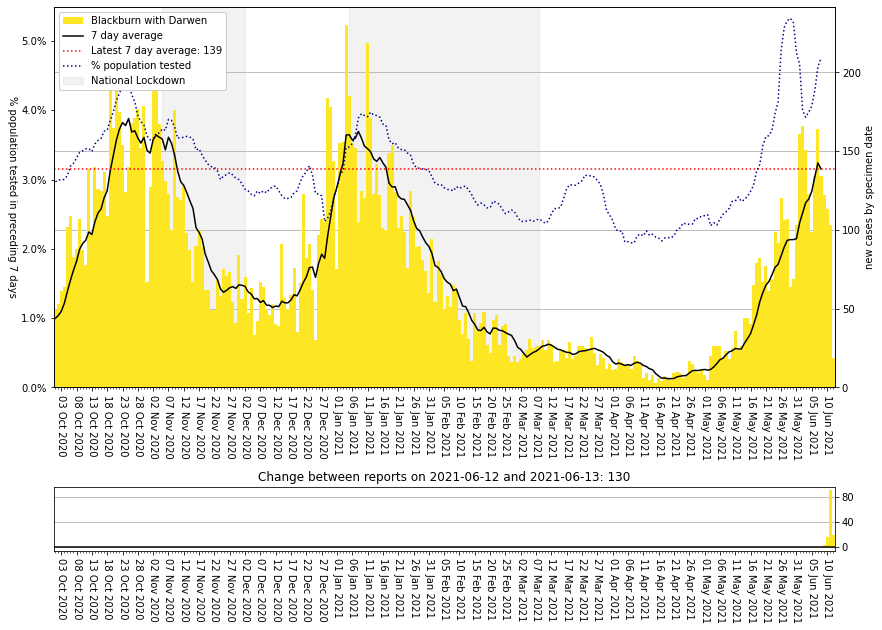

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000003,Manchester,286.511184,1584.0,2021-06-12
E08000035,Leeds,137.932947,1094.0,2021-06-12
E08000025,Birmingham,81.186461,927.0,2021-06-12
S12000036,City of Edinburgh,174.499457,916.0,2021-06-12
S12000049,Glasgow City,141.995198,899.0,2021-06-12
E06000008,Blackburn with Darwen,527.068192,789.0,2021-06-12
E08000001,Bolton,266.388454,766.0,2021-06-12
E08000006,Salford,290.920049,753.0,2021-06-12
E08000010,Wigan,215.418880,708.0,2021-06-12


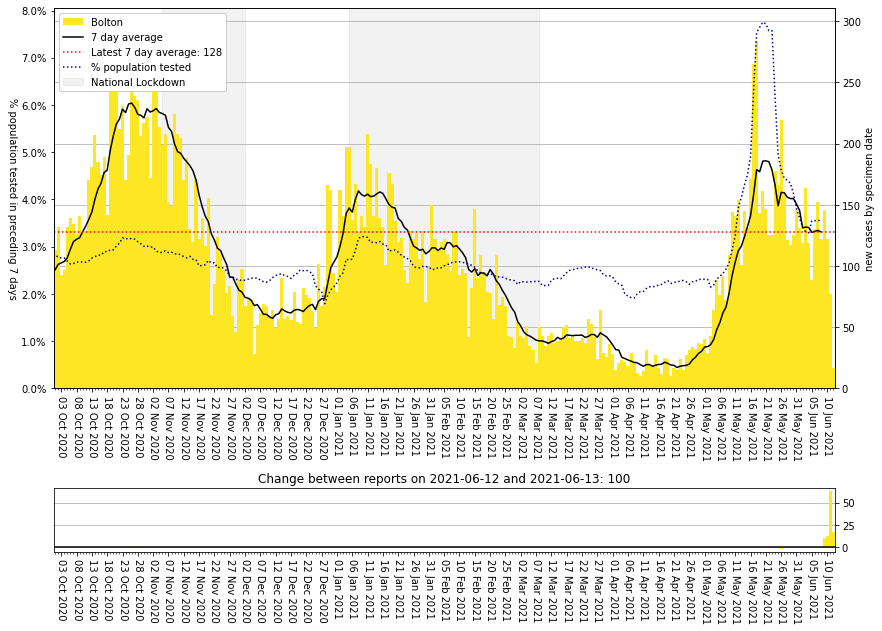

In [23]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [25]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 2.5
phe_max = 0.5

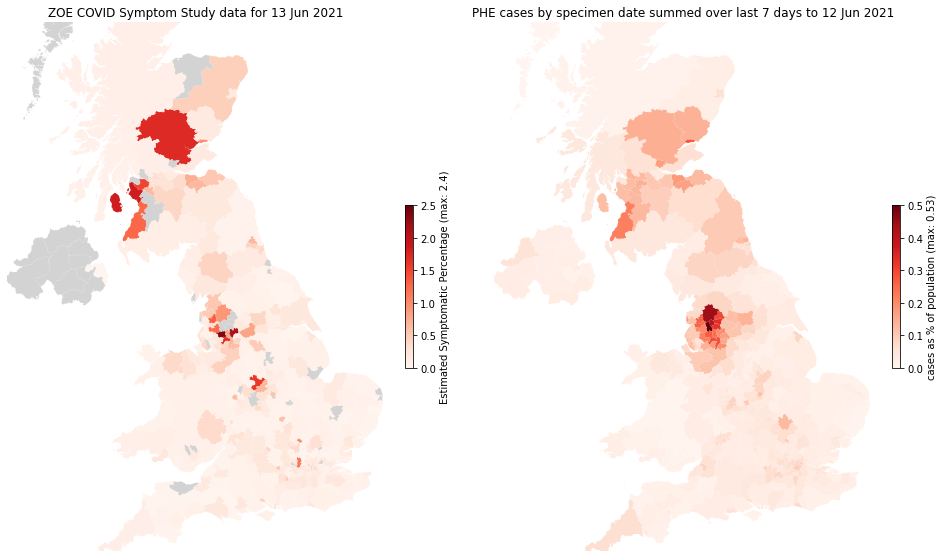

In [26]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [27]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...